## Desarrollo Guia_3
* Integrantes
    * 1. Yeison Andres Baron Lopez

In [248]:
!poetry add scikit-learn 

The following packages are already present in the pyproject.toml and will be skipped:

  - scikit-learn

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [249]:
## Carga de datos

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Cargar los datos
df = pd.read_csv(r'ObesityDataSet_raw_and_data_sinthetic.csv', sep=',', encoding='latin-1')


print(df.head())
display(df.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [250]:
display(df.info())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

None

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [251]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [252]:
# Obtener las métricas descriptivas para cada tipo de variable
metrics_Obesidad = df.describe()
print(metrics_Obesidad)

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

## Hipótesis 1: Relación entre Actividad Física (FAF) y Nivel de Obesidad
Quitare del analisis las variables Peso y altura, al ser las varialbes de calculo para el IMC

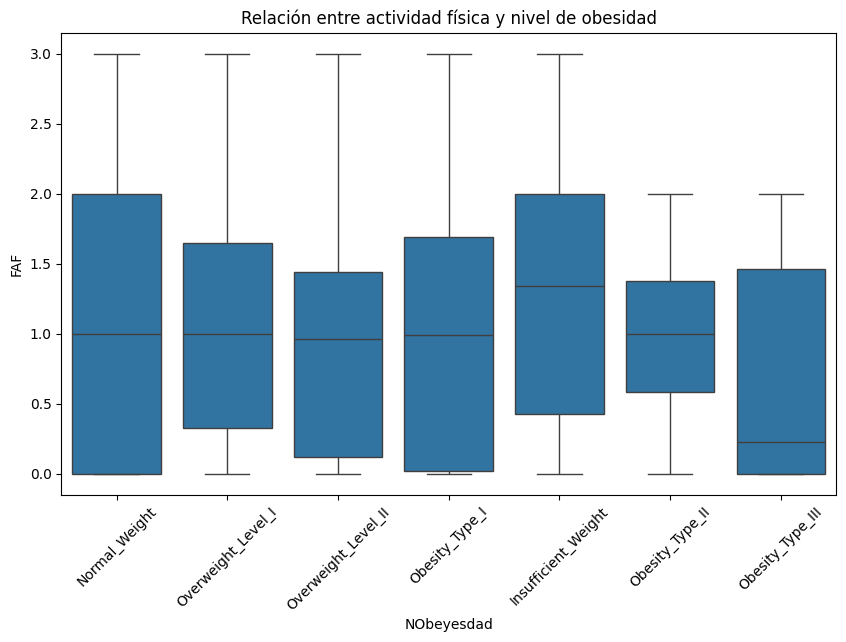

In [253]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NObeyesdad', y='FAF')
plt.title('Relación entre actividad física y nivel de obesidad')
plt.xticks(rotation=45)
plt.show()

## Hipótesis 2: Relación entre Consumo de Alimentos Calóricos (FAVC) y Frecuencia de Consumo de Vegetales (FCVC) con Obesidad

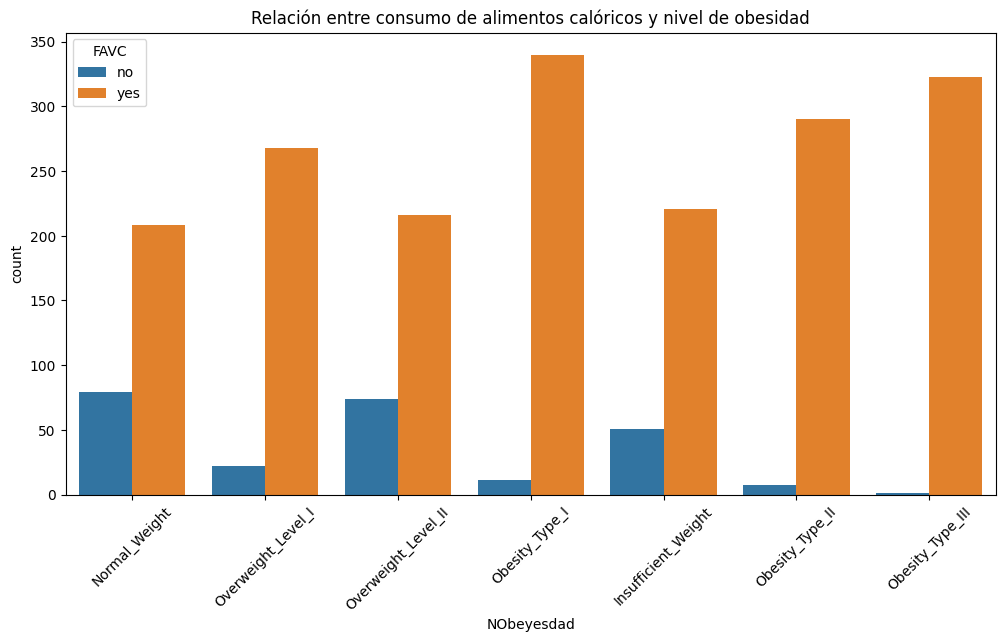

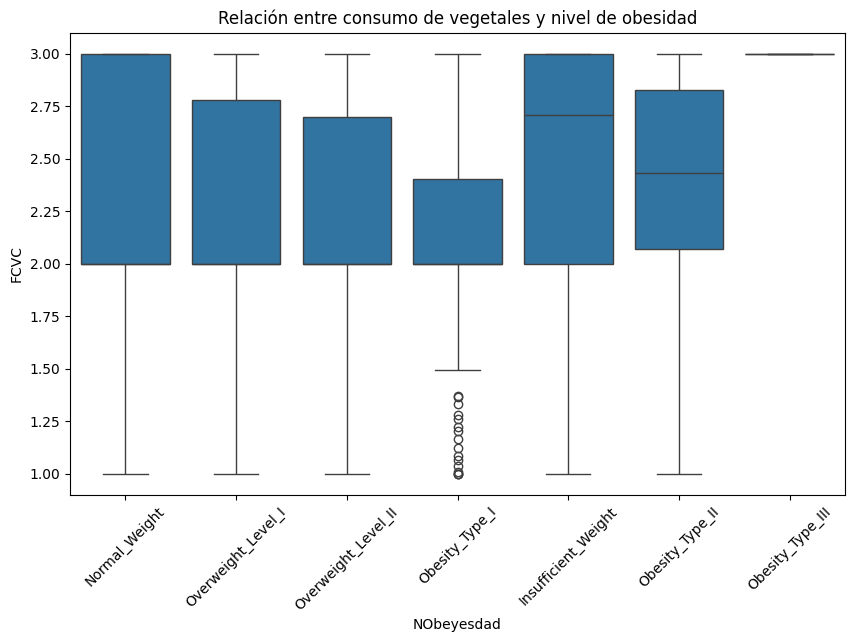

In [254]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='NObeyesdad', hue='FAVC')
plt.title('Relación entre consumo de alimentos calóricos y nivel de obesidad')
plt.xticks(rotation=45)
plt.show()

# Relación entre FCVC (frecuencia de consumo de vegetales) y NObeyesdad
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NObeyesdad', y='FCVC')
plt.title('Relación entre consumo de vegetales y nivel de obesidad')
plt.xticks(rotation=45)
plt.show()

## Hipótesis 4: Relación entre Consumo Diario de Agua (CH2O) y Obesidad

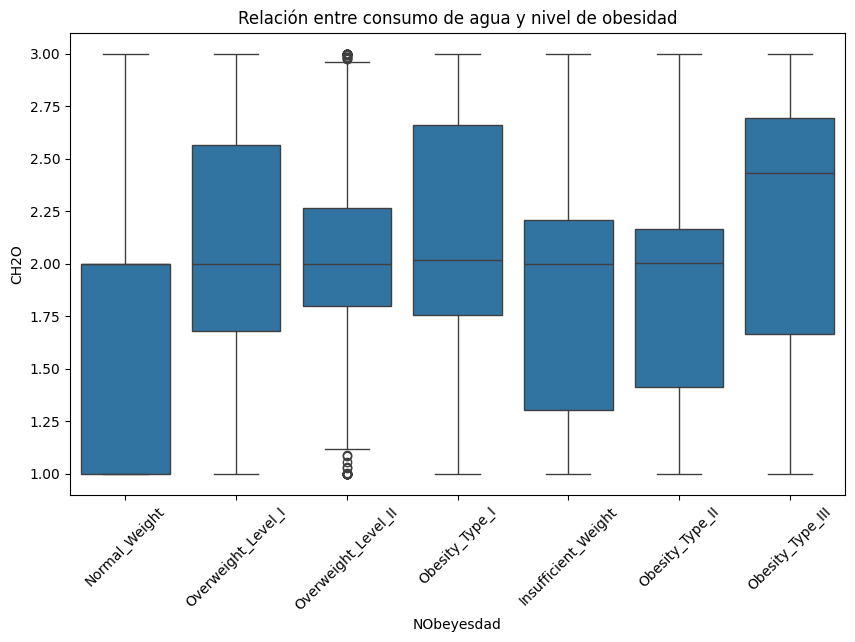

In [255]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NObeyesdad', y='CH2O')
plt.title('Relación entre consumo de agua y nivel de obesidad')
plt.xticks(rotation=45)
plt.show()

## Hipótesis 5: Impacto del Medio de Transporte (MTRANS) en el Nivel de Obesidad

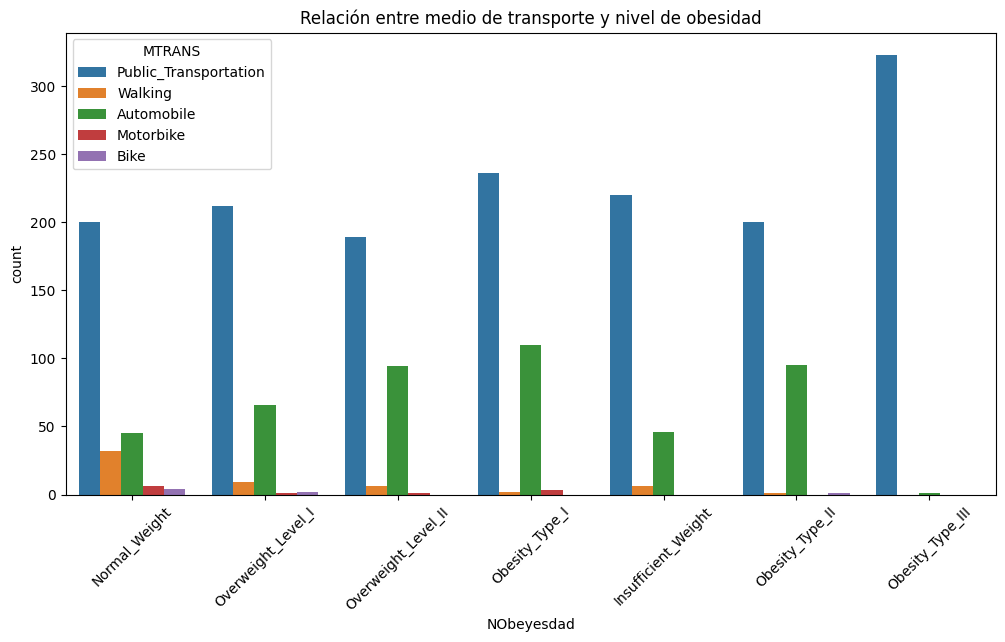

In [256]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='NObeyesdad', hue='MTRANS')
plt.title('Relación entre medio de transporte y nivel de obesidad')
plt.xticks(rotation=45)
plt.show()

## Aplicación de ACP
Aplicare el ACP sobre los datos estandarizados y visualiza la variabilidad explicada por cada componente principal.

In [257]:
# Selección de las columnas numéricas para ACP
#df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Estandarización de los datos
#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(df_numeric)

# Eliminar las columnas 'Height' y 'Weight'
df_reduced = df.drop(columns=['Height', 'Weight'])

# Selección de las columnas numéricas restantes para ACP
df_numeric = df_reduced.select_dtypes(include=['float64', 'int64'])

# Estandarización de los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [258]:
# ver las variables numericas 
V_numeric = df_numeric.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("\nVariables numericas:", V_numeric, sep="\n")


Variables numericas:
['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


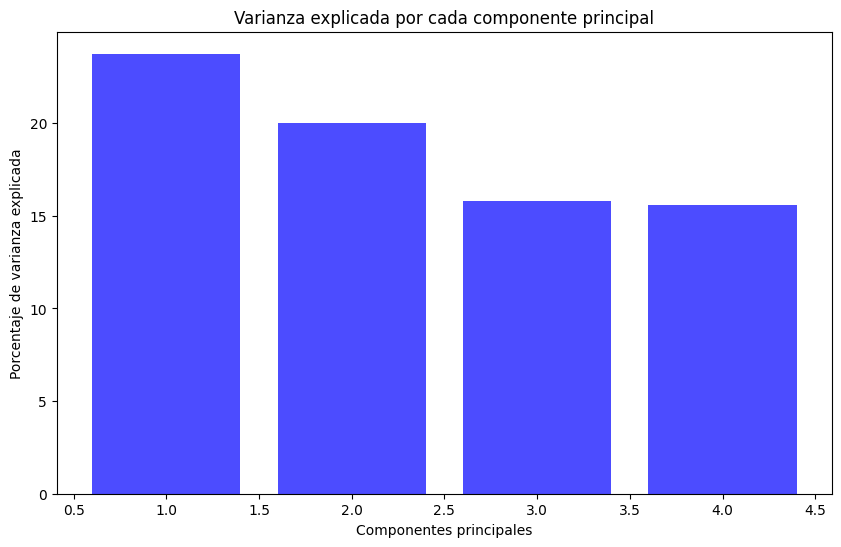

In [259]:
#aplicar el PCA a los dos componentes

pca = PCA(n_components=4)  #  componentes principales 
pca_result = pca.fit_transform(df_scaled)

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Visualización 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, alpha=0.7, color='b')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Varianza explicada por cada componente principal')
plt.show()

In [260]:
pca.explained_variance_ratio_ 

array([0.23743653, 0.20020375, 0.15799431, 0.15605518])

# Entre los 4 componentes  explica la variabilidad en el 66%

Visualización en 2D o 3D de los Componentes Principales

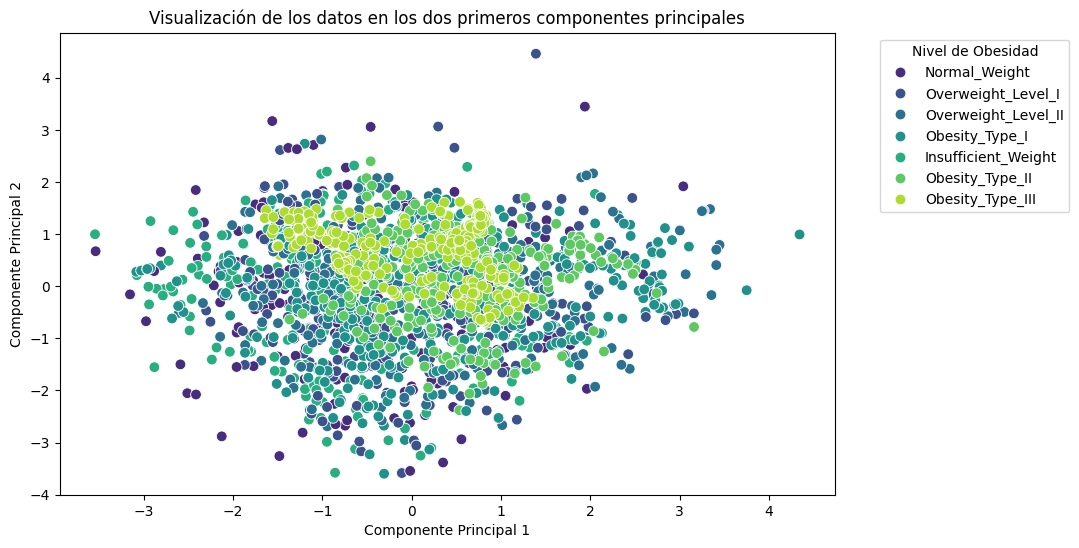

In [261]:
import seaborn as sns

# DataFrame con los dos primeros componentes principales
df_pca = pd.DataFrame(pca_result, columns=[f'PC{i}' for i in range(1, 5)])
df_pca['NObeyesdad'] = df['NObeyesdad']

# Visualización 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='NObeyesdad', palette='viridis', s=60)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de los datos en los dos primeros componentes principales')
plt.legend(title='Nivel de Obesidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Interpretación de los Componentes Principales
La gráfica de varianza explicada y el gráfico 2D nos permitieron observar la reducción de dimensionalidad. Ayudandonos a visualizar cómo se agrupan los datos según las categorías de obesidad en el espacio más reducido.

Para definir los clústeres y contrastarlos con la variable objetivo (nivel de obesidad), primero aplicaremos la  técnica de clustering K-Means sobre los datos reducidos con PCA. Luego, visualizare los resultados para interpretar cómo se alinean estos clústeres con las categorías de obesidad.

1. Aplicar K-Means Clustering
Primero, seleccionare el número de clústeres adecuado para los datos. Eligiere un número de clústeres usando el método del codo, pero para este ejerrcicio usare 4 clústeres como punto de partida.

In [262]:
from sklearn.cluster import KMeans

# Aplicare K-Means en los datos reducidos a 2 componentes principales
kmeans = KMeans(n_clusters=4, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2']])

In [263]:
CK=kmeans.cluster_centers_
print (CK)

[[-0.37463521 -1.40930508]
 [ 0.31834655  0.74786197]
 [ 1.59358431 -0.20253501]
 [-1.34006078  0.57284646]]


#impresión de la matriz de los centroides, se ven los dos componentes

*  Visualización de los Clústeres en el Espacio de los Componentes Principales
Visualizamos los clústeres resultantes en el espacio de los dos primeros componentes principales

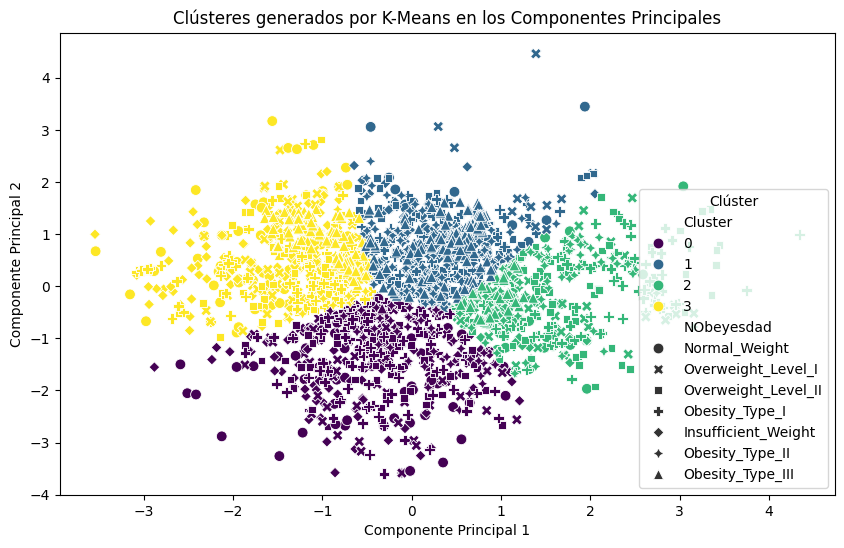

In [264]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=60, style='NObeyesdad')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clústeres generados por K-Means en los Componentes Principales')
plt.legend(title='Clúster')
plt.show()

En este gráfico:

* Cada color representa un clúster generado por K-Means.
* Los diferentes símbolos representan las categorías de obesidad (NObeyesdad), lo cual me permite ver cómo se alinean los clústeres con las etiquetas originales de obesidad.

 # Comparar los Clústeres con la Variable Objetivo
 * Ahora, vamos a crear un gráfico de conteo para ver cuántos individuos de cada categoría de obesidad (NObeyesdad) caen en cada clúster. Esto ayudará a interpretar qué categorías de obesidad están más asociadas con cada clúster.

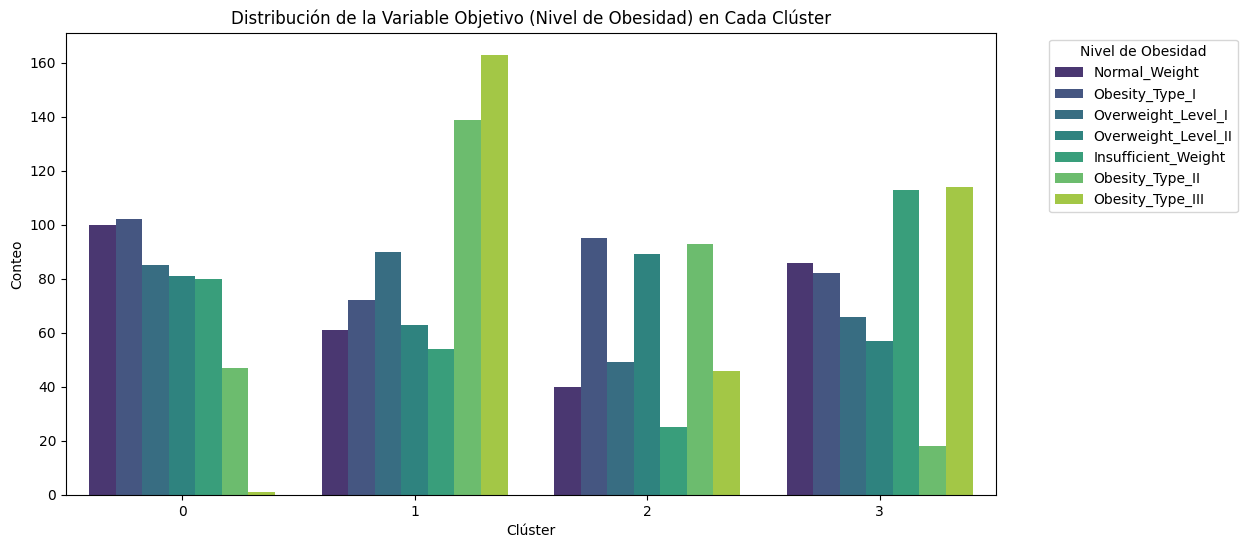

In [265]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_pca, x='Cluster', hue='NObeyesdad', palette='viridis')
plt.title('Distribución de la Variable Objetivo (Nivel de Obesidad) en Cada Clúster')
plt.xlabel('Clúster')
plt.ylabel('Conteo')
plt.legend(title='Nivel de Obesidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Interpretación de Resultados
* Distribución de Clústeres: Este gráfico de conteo deja ver que si existen varios niveles de obesidad mezclados en cada clúster.

Con este análisis visual, se puede ver cómo los grupos generados automáticamente corresponden a las categorías conocidas de obesidad.